           name
0  SalesRegions
1     Customers
2  Transactions


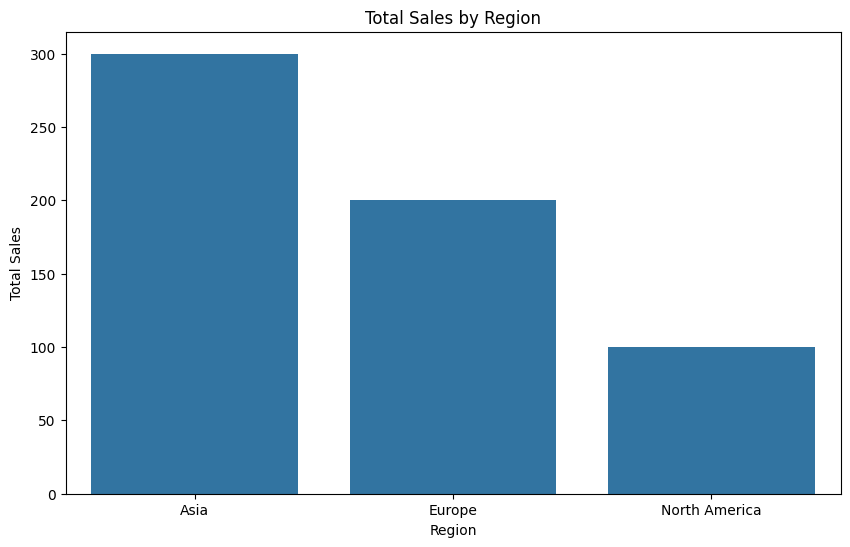

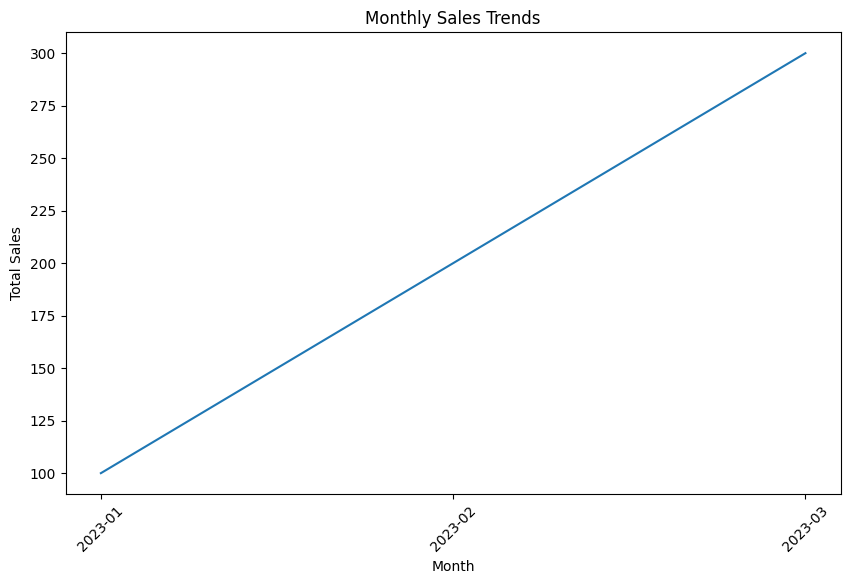

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('SalesDB.db')

# Verify connection by listing tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print(tables)

# Total Sales by Region
query = '''
SELECT sr.RegionName, SUM(t.TotalAmount) AS TotalSales
FROM Transactions t
JOIN Customers c ON t.CustomerID = c.CustomerID
JOIN SalesRegions sr ON c.RegionID = sr.RegionID
GROUP BY sr.RegionName;
'''
sales_by_region = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x='RegionName', y='TotalSales', data=sales_by_region)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.savefig('../visualizations/sales_by_region.png')
plt.show()

# Monthly Sales Trends
query = '''
SELECT strftime('%Y-%m', t.Date) AS Month, SUM(t.TotalAmount) AS TotalSales
FROM Transactions t
GROUP BY Month;
'''
monthly_sales = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TotalSales', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('../visualizations/monthly_sales_trends.png')
plt.show()

conn.close()
